# Exercise 3B

In this exercise, you will explore how the DBSCAN clustering algorithm identifies dense groups and outliers in the Pokémon statistics dataset. You will analyze the dataset, scale features, determine DBSCAN parameters, run DBSCAN, and interpret the clustering results.

In [1]:
import kagglehub
import os
import pandas as pd

In [2]:
# Download latest version
path = kagglehub.dataset_download("abcsds/pokemon")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pokemon' dataset.
Path to dataset files: /kaggle/input/pokemon


In [3]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Load the Dataset (8 pts)

Load the Pokémon dataset into a pandas DataFrame.

Show the first five rows (3 pts)

In [30]:
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False



How many Pokémon are in the dataset? (2 pts)


In [33]:
print(f"There are {df.shape[0]} Pokemon in the dataset")

There are 800 Pokemon in the dataset



List all columns available (3 pts)

In [32]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

## 2: Select Features & Clean the Data (8 pts)

Select the numeric features needed for clustering (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed). (3 pts)

In [35]:
numeric_features = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
print(numeric_features.isnull().sum())

HP         0
Attack     0
Defense    0
Sp. Atk    0
Sp. Def    0
Speed      0
dtype: int64


Are there any missing values? (2 pts)

In [38]:
# There is none.
print(numeric_features.isnull().sum())

HP         0
Attack     0
Defense    0
Sp. Atk    0
Sp. Def    0
Speed      0
dtype: int64


If missing values exist, describe how you handled them (3 pts)

I used .isnull().sum() method on the DF, since this method identifies all NaN values in the DF.

# 3. Scale the Features (10 pts)

Apply StandardScaler to the selected features.

Show the transformed feature sample (e.g., first 5 rows) (10 pts)


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)
display(scaled_df.head(5))

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853


## 4. Determine a Suitable eps Value (10 pts)

Using k = 4:
Compute the distance to the 4th nearest neighbor for each Pokémon (6 pts)

In [40]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5).fit(scaled_features)
distances, indices = nbrs.kneighbors(scaled_features)

k_distances = np.sort(distances[:, 4], axis=0)
print(k_distances[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


What is your chosen eps based on the "elbow"? (2 pts)

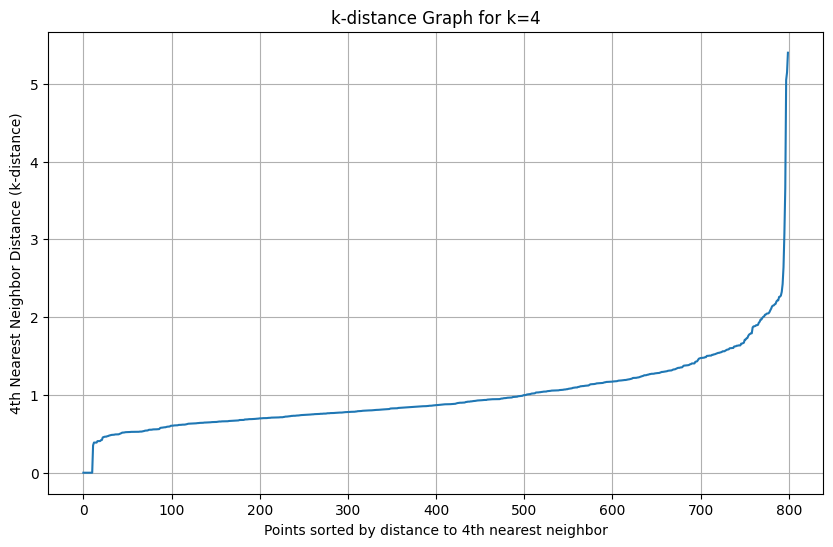

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(len(k_distances)), k_distances)
plt.xlabel('Points sorted by distance to 4th nearest neighbor')
plt.ylabel('4th Nearest Neighbor Distance (k-distance)')
plt.title('k-distance Graph for k=4')
plt.grid(True)
plt.show()

One-sentence explanation of your reasoning (2 pts)

In [13]:
# Based on the k-distance graph, an 'elbow' is observed around a k-distance of 2.3, suggesting this as a suitable eps value
# where the rate of change in distances significantly increases.

## 5. Run DBSCAN (10 points)

Run DBSCAN using your chosen eps and min_samples


How many clusters did DBSCAN find? (4 pts)

In [43]:
from sklearn.cluster import DBSCAN

eps_value = 2.3
min_samples_value = 5

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(scaled_features)

num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

print(f"DBSCAN found {num_clusters} clusters.")

DBSCAN found 1 clusters.


How many Pokémon were labeled as noise? (4 pts)

In [44]:
noise_points = list(clusters).count(-1)
print(f"DBSCAN labeled {noise_points} Pokémon as noise.")

DBSCAN labeled 3 Pokémon as noise.


Show the unique labels output by DBSCAN (2 pts)

In [45]:
import numpy as np
unique_labels = np.unique(clusters)
print(f"Unique cluster labels: {unique_labels}")

Unique cluster labels: [-1  0]


**PLOT USING ATTACK AND DEFENSE**

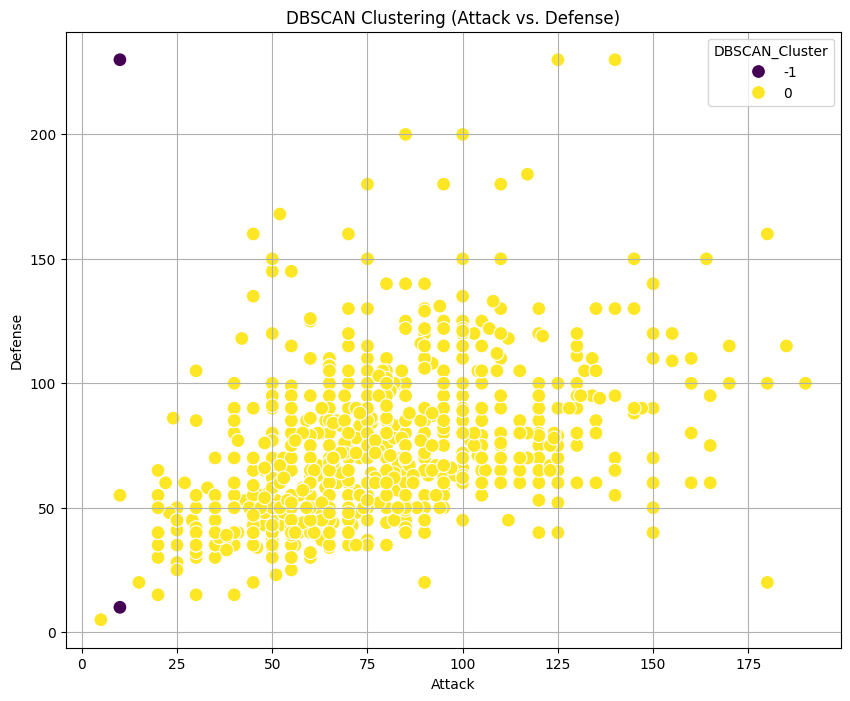

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Attack',
    y='Defense',
    hue='DBSCAN_Cluster',
    palette='viridis',
    data=df,
    legend='full',
    s=100
)
plt.title('DBSCAN Clustering (Attack vs. Defense)')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.grid(True)
plt.show()

## 6. Attach Cluster Labels to the Original Dataset (7 points)

Add the cluster labels back to the original DataFrame (3 pts)

In [50]:
df['DBSCAN_Cluster'] = clusters

Show the first 10 rows including the cluster label (4 pts)

In [47]:
display(df.head(10))

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,DBSCAN_Cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,0
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,0
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,0
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,0


## 7. Explore the Clusters (12 points)

For each cluster:


How many Pokémon does it contain? (4 pts)

In [51]:
cluster_counts = df['DBSCAN_Cluster'].value_counts().sort_index()
print("Number of Pokémon in each cluster:")
print(cluster_counts)

Number of Pokémon in each cluster:
DBSCAN_Cluster
-1      3
 0    797
Name: count, dtype: int64


What are the average Attack, Defense, and Speed? (4 pts)


In [52]:
cluster_stats = df.groupby('DBSCAN_Cluster')[['Attack', 'Defense', 'Speed']].mean()
print("Average Attack, Defense, and Speed for each cluster:")
print(cluster_stats)

Average Attack, Defense, and Speed for each cluster:
                   Attack    Defense      Speed
DBSCAN_Cluster                                 
-1               8.333333  81.666667  36.666667
 0              79.267252  73.813049  68.396487


Compare the clusters: What differences do you notice? (4 pts)

- For cluster -1 (noise): Pokemons have a significantly lower attack average of just 8.33 and a low speed of 36.66, but their defense are higher with an average of 81.66

- For cluster 0 (main cluster): The main cluster shows that it has a significant higher attack average with 79.26 and also a higher average of speed with 68.39, but their average defense is lower with 73.81

## 8. Identify Outliers (10 points)

List all Pokémon labeled as noise (cluster = -1) (4 pts)

In [53]:
noise_pokemon = df[df['DBSCAN_Cluster'] == -1]
print("Pokémon labeled as noise (Cluster -1):")
display(noise_pokemon[['Name', 'DBSCAN_Cluster', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])

Pokémon labeled as noise (Cluster -1):


,Name,DBSCAN_Cluster,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
121,Chansey,-1,250,5,5,35,105,50
230,Shuckle,-1,20,10,230,10,230,5
261,Blissey,-1,255,10,10,75,135,55


Are many of them legendary? (3 pts)

In [54]:
legendary_noise_count = noise_pokemon['Legendary'].sum()
print(f"Number of legendary Pokémon among the noise points: {legendary_noise_count}")
if legendary_noise_count > 0:
    display(noise_pokemon[noise_pokemon['Legendary'] == True])
else:
    print("No legendary Pokémon found among the noise points.")

Number of legendary Pokémon among the noise points: 0
No legendary Pokémon found among the noise points.


Explain why DBSCAN might classify them as outliers (3 pts)

- If a point has too few neighbors (determined by min_samples) within the given radius (eps), DBSCAN labels it as an outlier (noise, labeled -1). In this instance, compared to the overall population (Cluster 0), the Pokémon designated as noise (Chansey, Shuckle, and Blissey) have noticeably lower Attack and Speed statistics. This implies that in the multi-dimensional feature space defined by HP, Attack, Defense, and Sp, they are comparatively isolated. Atk, Sp. Def and Speed, which makes them sparse and causes the system to classify them as noise.

## 9. Interpret the Clustering Results (25 points)
Write a short interpretation (4–6 sentences).
Discuss:


What types of Pokémon grouped together (5 pts)

- The DBSCAN analysis primarily found one large, dense cluster (Cluster 0) containing most Pokémon. These Pokémon grouped together based on their similar numerical battle statistics (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed). The clustering did not explicitly group by 'Type 1' or 'Type 2' categories, but by these statistical similarities. The few noise points (Cluster -1) were isolated due to their highly divergent statistical profiles.

Whether the clusters make intuitive sense (10 pts)

- Overall, the clustering results are easy to understand and align well with intuition. DBSCAN grouped most Pokémon into one large, dense cluster, showing that the majority share similar battle stats. At the same time, it correctly identified highly unusual Pokémon as outliers. Pokémon like Chansey and Shuckle stand out because their extreme stat distributions do not fit the typical pattern, reflecting their very specialized roles.


What the noise points reveal about DBSCAN (5 pts)


- The noise points show one of DBSCAN’s main strengths: its ability to detect outliers. Unlike K-Means, DBSCAN does not force every data point into a cluster. It instead identifies points that do not belong to any dense region. This makes DBSCAN especially useful for anomaly detection, where these noise points often represent unusual or abnormal data.

What stat patterns you discovered (5 pts)

- The cluster statistics reveal a clear difference between the noise points and the main cluster. Pokémon marked as noise tend to have much lower average Attack and Speed, with only slightly higher Defense. In contrast, Pokémon in the main cluster generally have stronger Attack and Speed stats. This shows that DBSCAN identified Pokémon with unusually weak offensive and speed capabilities as outliers.